# Entity-Relationship Modeling
Databases support various applications. Entity-Relationship modeling is the defacto approach to designing a relational database for your data-driven applications.

In this lab, we will walk-through the steps for creating a database model. The learning objectives include:

1. Understanding basic E-R concepts - Entity, Attributes, Keys (Primary, Compound, and Foreign)
2. Userstand the principles of normalization and how it is used to iteratively model a database to fit various application needs. 
3. Walk through the normalization steps of a database from the first normal form (1NF) to 3NF
4. Understand how to use the free db diagraming tool such www.dbdiagram.io for your normalization excerises.
5. Walk through the process of developing a data dictionary.
6. Understand how to build our SQLite database from the output of our model.

**References**
1. **Chapter 4. Normalization**: http://www.csc.villanova.edu/~mdamian/Past/databasefa13/notes/ch04-Normalization.pdf

2. **Database Normalization**: https://www.guru99.com/database-normalization.html

3. **Normalization**: https://opentextbc.ca/dbdesign01/chapter/chapter-12-normalization/


## E-R Concepts

1. **Entity**: This is a representation of a collection of database objects representing a person, place, or a thing. 

2. **Attribute**: It is a data element that define an entity.

3. **Key**: This is an identifier for an entity. Using this identifier, we can retrieve, update, sort and even delete this entity.

In the example below, we show an ORDER entity. This order has the following attributes - order number, order date, item number, quantity, and amount.

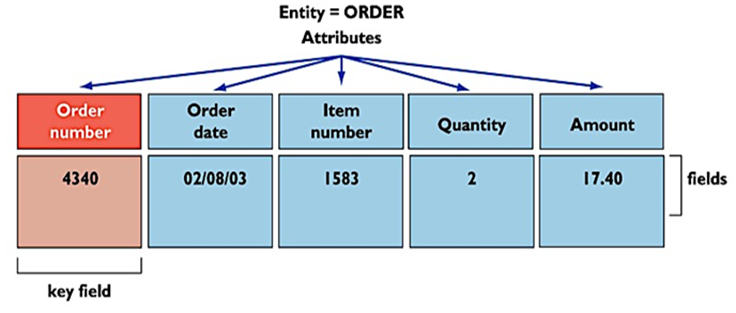

We should not interprete an entity as a table. Rather, a table is a collection of entities. A database table is an implementation of the model defined for the entity. So the Order table implements the ORDER entity - keys, attributes, and constraints.


## Relational Databases

A relational database implements the related model for an application. It represents data as two-dimensional tables with relations.

Rows in each table are also called records or tuples. These are collection of entities that share the same model. Each column or field in the table represents the attribute of the represented entity. 

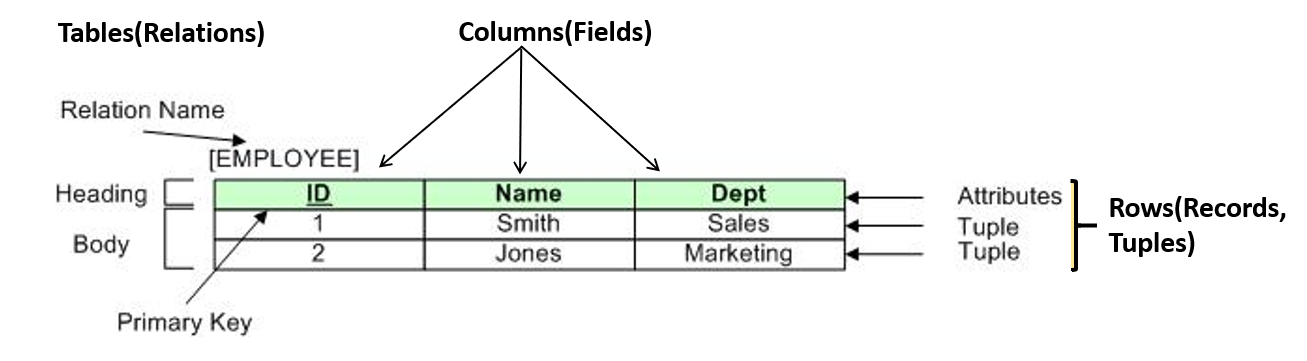

Popular implementations of relational databases include Microsoft SQL Server, Oracle, and MySql.

## Normalization

Why do we need normalization? Let's start with an example. The sample report below shows a sample of an employees payroll based on the hours billed for on project.

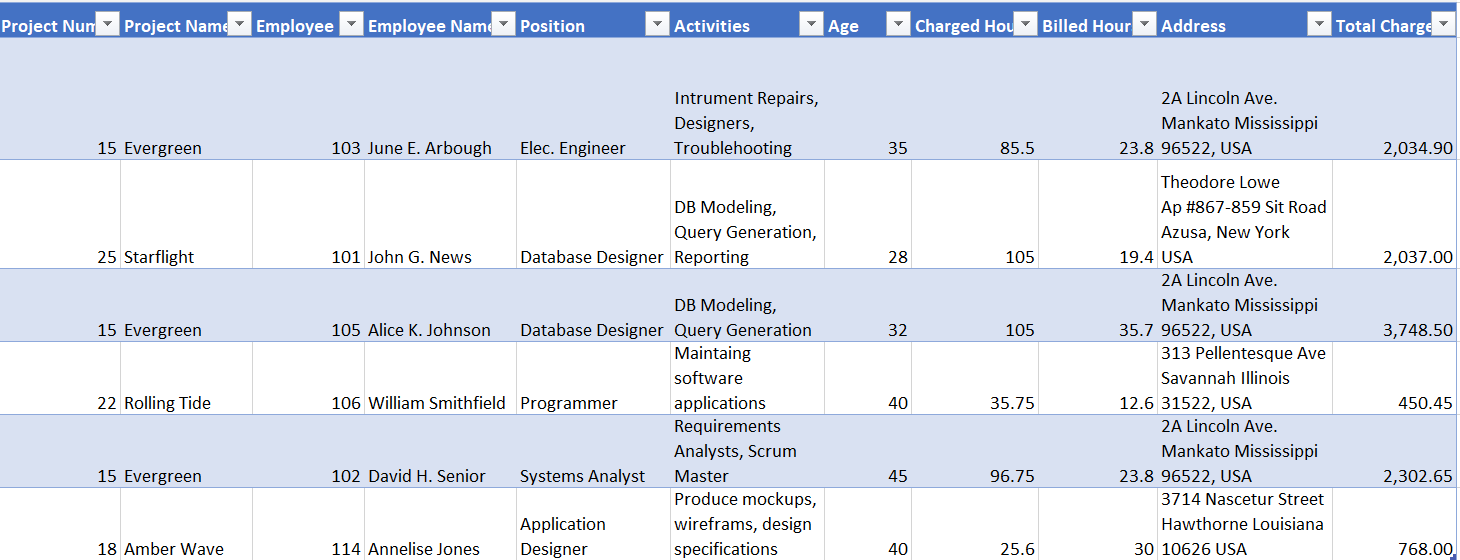



### Context
Based on the report above, we identify employees, project, position, hourly charge, hours billed, acitivities billed, and the address of the employee.

This is an example of a denormalized entity. 

Let us assume that we are tasked with developing the proper relational model to support an application that will provide such a report, we do need to normalize the database appropriately?

**Denormalized Model**

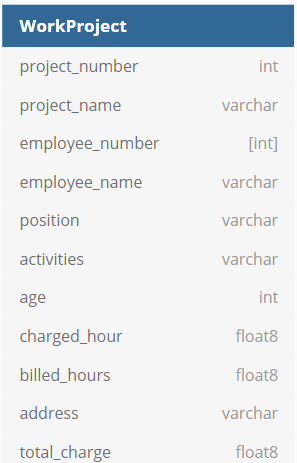

https://dbdiagram.io/d/5f0c80680425da461f049b4f

** Why is normalization necessary? **
- We have to retype the project name, employee name, activity, etc. for each entry.

- What happens if the project name changes, we will have to search/replace the name across the entire database?

- What would happen is an employee is re-assigned to a different project. Are we able to capture this information?

There are many more reasons why this model will not work as a database for our application. There are so many strings that we have to track across records for updates or delete actions.

The next sections will review the steps towards normalizing this dataset.

## First Normal Form (1NF)

For our model to be in the 1NF:
1. Ensure that attribute values with multiple values, composite values, repeating groups are separated so every column in each record has a single value.
2. Identify and ensure that each entity is identified by a Primary Key.

To get our current model to 1NF:
- The total charge, a composite attribute we need to be dropped since it can be calculated off the billed hours and the charge per hour.
- Activties attribute have repeating values. We will need to break those up to one activity per record for the same entity.
- We identify each entry by the project number which essentially becomes the primary key for the table.

**1NF Model**

https://dbdiagram.io/d/5f121cc974ca2227330d802f

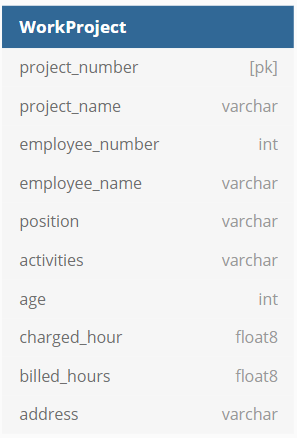

**Sample Table**
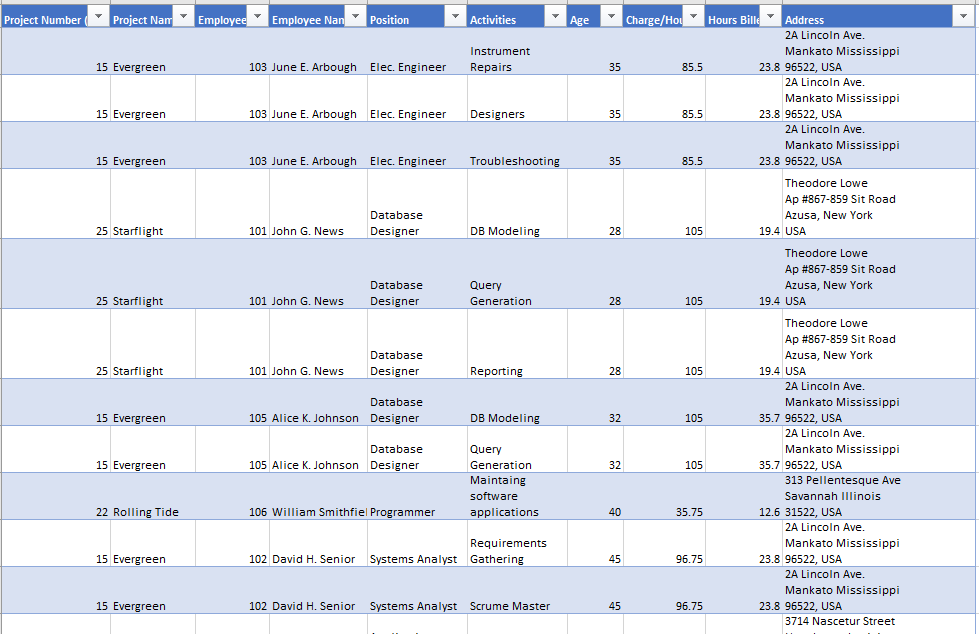


**Table(s) in 1NF**

**WorkProject**  (ProjectNumber, ProjectName, EmployeeNumber, Position, Activity, Age, ChargePerHour, HoursBilled, Address)

**Summary of Changes**
1. We have been able to remove composite value -  total charge - since it can be calculated, repeating values like activities is set to one activity per record.
2. Our entity - WorkProject -  now has a key that uniquely identifying each entity.

**Anomalies with the model**
1. Adding a new address, activity, position, and hourly rate require a new record to the table.
2. One can easily have typos in the the name of an employee, project names, activities, addresses since they are repeated across records
3. Deleting a project means deleting an employee record and can result in some inconsistencies.
4. Updating an employee position or address can result in inconsistencies in other records with the same value.

## Second Normal Form (2NF)

For our model to be in the 2NF, it needs to meet 1NF requirements described above. Additionally, there should be no ***partial dependencies*** in the entities. That means, all non-key attributes must depend on the primary key. 

To achieve 2NF, we go through the following steps:
1. We pull all the employee related fields from the ***WorkProject*** table since they all partially dependent on the key.
2. We create a new table **Employee** and move all the fields to this tables and ensure that this table also has a  Primary Key. 
3. Address is not on the employee id, so we move it to a new table.
4. Attributes like position, activity, charge per hours, and hours billed are not dependent on the employee id. So we move those to the **EmployeeProject** table.

The resulting model is shown here.
https://dbdiagram.io/d/5f11cde274ca2227330d7da7






**2NF Tables**
- **WorkProject** (Id, ProjectName)
- **Employee** (id, Surname, Firstname, Middlename, Age, AddressId)
- **Address** (id, Address)
- **EmpoyeeProject** (EmployeeId, ProjectId, Position, Activity, ChargePerHour, HoursBilled)

**2NF Conclusions**
- We can now see that each attribute depends on the key for the table. We have now removed those partial dependencies between project and employees.

**What is still missing**
1. An employee has only one address. If they move and we change their address, the previous record is lost forever.
2. An employee can only have one entry in the EmployeeProject table per project. We are unable to capture multiple positions per project or billed activities.
3. We capture the charge per hour for each activity. If the employee position determines their hourly charge, then we are repeating this value for each record in this table. Also to capture the charge, we need to capture activity details and hours billed.

## Third Normal Form (3NF)

For our model to be in the 3NF, it needs to meet 1NF & 2NF requirements described above. Additionally, there should be **no transitive dependencies** in the entities. 

Transitive dependency refer to those non-key attributes that are dependent on a different attribute that isn't necessarily the key attribute of the entity. Rather, they depend on this attribute that is then dependent on the key. 

In our 2NF model, billed hours can be associated with different hourly rates (based on the job position). Also hours billed is dependent on the project activity  and not the project. 

Also, the charge is dependent on the position, not really the activity. Employees can participate in different projects and are paid based on the position.

These transitive dependencies on non-key attributes ***position->charge_per_hour*** and ***activity->hours_billed*** needs to be fixed.


We need to normalize this database further to address these issue. We introduce the following tables:

**EmployeePosition** (id, EmployeeId, PositionId, ChargePerHour) - 
We also introduce a PK that ensures that an employee can have multiple positions/charges per hour.

**EmployeeProjectActivity** (id, EmployeePositionId, ProjectId, ActivityId, ActivityDate, HoursBilled) - 
Here we are tracking hours billed by an employee based on their activities in a project. Since we can have multiple activities billed at each date, we will add a new PK to track each entry.

**EmployeeAddress** (EmployeeId, AddressId, StartDate, EndDate) - In this table, we are tracking employee addresses. Since an employee can be in one address, we use a compound key of employee and address ids to track the addresses.

**3NF Model**: 
https://dbdiagram.io/d/5f1bb88de586385b4ff7dd00




## Data Dictionary

Provides organization specific documentation on the E-R model.

The data model for this lab is located here.

https://docs.google.com/spreadsheets/d/1TBRy77hfcJ8J4ntRmJvi6B5v5inAroJu7-6qg0XO8g8/edit?usp=sharing

As shown, the dictionary contains:
- Entity name / description
- Attributes
- Data Type and Format
- Field Size
- Attribute description with examples
- Required status
- Primary Key/Foreign Key
- Foreign Key Reference Table




## Exporting E-R design

The final E-R design can be exported as a PDF document with the data dictionary. 

In some instances, the tool can allow you to translate those automatically into database SQL statements for creating the database.